In [1]:
import cv2
import numpy as np

In [15]:
img=cv2.imread("/Users/lakshmikeerthanaaravapalli/Desktop/ComputerVision/shapes.png")
img=cv2.resize(img,(600,700))
img_gry=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,threshold=cv2.threshold(img_gry,200,255,cv2.THRESH_BINARY_INV)

cnts,hier=cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img=cv2.drawContours(img,cnts,-1,(10,20,100),2)

In [17]:
#moments

# loop over the contours
for c in cnts:
    # compute the center of the contour
    #an image moment is a certain particular weighted average (moment) of the image pixels
    M = cv2.moments(c)
    print("M==",M)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    # draw the contour and center of the shape on the image
    cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
    cv2.circle(img, (cX, cY), 7, (255, 255, 255), -1)
    cv2.putText(img, "center", (cX - 20, cY - 20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    

M== {'m00': 9217.5, 'm10': 3403082.5, 'm01': 4681369.5, 'm20': 1259863001.9166665, 'm11': 1728354771.875, 'm02': 2392045141.9166665, 'm30': 467687576127.35004, 'm21': 639823597838.9166, 'm12': 883141301256.1167, 'm03': 1229710560698.25, 'mu20': 3451773.0795361996, 'mu11': 2548.226098537445, 'mu02': 14478513.706170559, 'mu30': -90956.12762451172, 'mu21': -35536958.84927416, 'mu12': 447440.8199863434, 'mu03': 135761139.7307129, 'nu20': 0.04062711138489369, 'nu11': 2.9992430890933408e-05, 'nu02': 0.17041102513822776, 'nu30': -1.1150622076027715e-05, 'nu21': -0.00435659705628032, 'nu12': 5.485329702746838e-05, 'nu03': 0.016643421408587006}
M== {'m00': 12847.0, 'm10': 2868920.833333333, 'm01': 6550380.333333333, 'm20': 646016729.0, 'm11': 1462791759.4166665, 'm02': 3372663373.1666665, 'm30': 146652244442.35, 'm21': 329386608118.95, 'm12': 753161219371.1167, 'm03': 1753072509060.1, 'mu20': 5345229.978125215, 'mu11': -2870.034329175949, 'mu02': 32779936.463926315, 'mu30': 34915.1174621582, 'm

In [23]:
#contourarea,approximation and convexhull

img=cv2.imread("/Users/lakshmikeerthanaaravapalli/Desktop/ComputerVision/shapes.png")
img=cv2.resize(img,(600,700))
img_gry=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,threshold=cv2.threshold(img_gry,200,255,cv2.THRESH_BINARY_INV)

cnts,hier=cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img=cv2.drawContours(img,cnts,-1,(10,20,100),2)

area1 = []
# loop over the contours
for c in cnts:
    # compute the center of the contour
    #an image moment is a certain particular weighted average (moment) of the image pixels
    M = cv2.moments(c)
    #print("M==",M)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    #find area of contour
    area = cv2.contourArea(c)
    area1.append(area)
    
    if area<10000:
        #contour Approx -  it is use to approx shape with less number of vertices
        epsilon = 0.01*cv2.arcLength(c,True) #arc lenght take contour and return its perimeter
        data= cv2.approxPolyDP(c,epsilon,True)
        #Convexhull is used to provide proper contours convexity.
        
        hull = cv2.convexHull(data)
        
        x,y,w,h = cv2.boundingRect(hull)
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(125,10,20),5)
 
    # draw the contour and center of the shape on the image
    cv2.drawContours(img, [c], -1, (50, 100, 50), 2)
    cv2.circle(img, (cX, cY), 7, (255, 255, 255), -1)
    cv2.putText(img, "center", (cX - 20, cY - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    

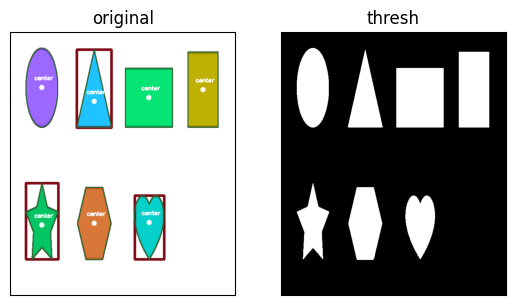

In [24]:
titles = ["original","thresh"]
images = [img,threshold]

#if you want then plot it
from matplotlib import pyplot as plt
for i in range(len(titles)):
    plt.subplot(1,2, i+1), 
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])